<a href="https://colab.research.google.com/github/wesmith4/mat210/blob/main/hw3/humDev.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Pulling Human Development Index data
Data from Wikipedia page, [List of countries by Human Development Index](https://en.wikipedia.org/wiki/List_of_countries_by_Human_Development_Index)

In [35]:
from bs4 import BeautifulSoup
from urllib.request import urlopen
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
# Open and read in the page content from Wikipedia
pageaddress = "https://en.wikipedia.org/wiki/List_of_countries_by_Human_Development_Index"
soup = BeautifulSoup(urlopen(pageaddress), "html.parser")

In [10]:
table = soup.find_all('table', {'class': "wikitable"})[0]
df = pd.read_html(str(table),header=1)
print(df[0])

    2019 data (2020 report)​[10]  ...                   Unnamed: 5
0    Very high human development  ...  Very high human development
1                              1  ...                          NaN
2                              2  ...                          NaN
3                              2  ...                          NaN
4                              4  ...                          NaN
..                           ...  ...                          ...
188                          185  ...                          NaN
189                          185  ...                          NaN
190                          187  ...                          NaN
191                          188  ...                          NaN
192                          189  ...                          NaN

[193 rows x 6 columns]


In [21]:
myDF = df[0]
myDF = myDF.drop([0])

In [26]:
myDF[myDF['Country or Territory'] == 'United States']

,2019 data (2020 report)​[10],Change over 5 years (2014)​[2],Country or Territory,2019 data (2020 report)​[10].1,Average annual HDI growth (2010-2019)​[2],Unnamed: 5
17,17,(3),United States,0.926,0.12%,NaN


In [32]:
myDF = myDF.rename(columns={"2019 data (2020 report)​[10].1": "HDI_2019", "Average annual HDI growth (2010-2019)​[2]": "HDI_growth"})

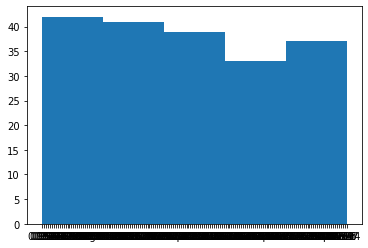

In [41]:
myDF['HDI_2019']
plt.hist(myDF['HDI_2019'],bins=5,label=4)
plt.show()